In [50]:
# Import necessities 
import math
from sub_dual_autodiff import Dual

In [51]:
# Qestion 4
x = Dual(10,4)
y = Dual(5,17)
print(x+y)

Dual(real=15, dual=21)


In [52]:
# Question 5 - Calculating analytical derivative and using dual numbers to find derivative at x=1.5

from sub_dual_autodiff import Dual
import math

# Define the function
def f(x):
    return x.sin().log() + (x * x) * x.cos()

# Analytical derivative for comparison
def analytical_derivative(x):
    return (math.cos(x) / math.sin(x)) - (x ** 2) * math.sin(x) + 2 * x * math.cos(x)

# Test the complex function
x_dual = Dual(1.5, 1.0)  # Dual number at x=1.5 with derivative part 1
result_dual = f(x_dual)

# Compare to analytical derivative
x_value = 1.5
analytical = analytical_derivative(x_value)

print(f"function f(x) using dual numbers at x=1.5: Derivative={result_dual.dual}")
print(f"Analytical derivative at x=1.5: {analytical}")




function f(x) using dual numbers at x=1.5: Derivative=-1.9612372705533612
Analytical derivative at x=1.5: -1.9612372705533614


In [57]:
# Question 5 - calculating the numerical derivative at x=1.5

import math

# Define the function f(x)
def f(x):
    return math.log(math.sin(x)) + (x ** 2) * math.cos(x)

# Numerical derivative using finite differences
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

# Parameters
x_value = 1.5
h = 1e-5  # Small step size

# Compute numerical derivative
numerical_result = numerical_derivative(f, x_value, h)

# Print the result
print(f"Numerical derivative of f(x) at x = {x_value} with h = {h}: {numerical_result}")


Numerical derivative of f(x) at x = 1.5 with h = 1e-05: -1.9612723090589588


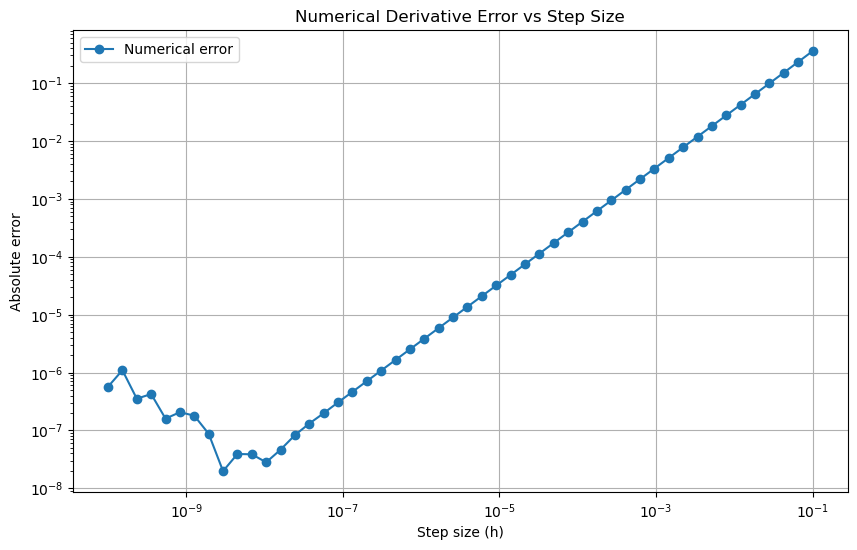

In [59]:
# Question 5 - plotting numerical error size vs step size

import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

# Analytical derivative of f(x)
def f_prime_analytical(x):
    return np.cos(x) / np.sin(x) + 2 * x * np.cos(x) - x**2 * np.sin(x)

# Numerical derivative using finite differences
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

# Evaluate at x = 1.5
x_val = 1.5
analytical_derivative = f_prime_analytical(x_val)

# Numerical derivative for different step sizes
h_values = np.logspace(-10, -1, 50)  # Step sizes from 10^-1 to 10^-8
numerical_derivatives = [numerical_derivative(f, x_val, h) for h in h_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(h_values, np.abs(numerical_derivatives - analytical_derivative), label="Numerical error", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute error')
plt.title('Numerical Derivative Error vs Step Size')
plt.grid(True)
plt.legend()
plt.savefig("Numerical_derivative_error.png")
plt.show()